In [ ]:
!pip install jupyterthemes
!pip install --upgrade jupyterthemes

In [ ]:
!pip install seaborn

In [ ]:
!pip install linearmodels

In [ ]:
!pip install statsmodels 

In [ ]:
!pip install xlrd

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sn

In [ ]:
dr = "/Users/shritej/Documents/Masters Courses/Quanquan Liu/Data/Excel/"

crrptn = pd.read_excel(dr+"Corruption.xls", sheet_name = "Data")
crrptn.head()

In [ ]:
crrptn.shape[1]

In [ ]:
crrptn.iloc[2]


In [ ]:
crrptn.loc[:,"Unnamed: 44"]

In [ ]:
drp_col = ["Unnamed: "+ str(i) for i in range(4, 44)]
drp_col.extend(['Unnamed: 65', 'Unnamed: 64'])

print(drp_col)
crp_drpcol = crrptn.drop(columns = drp_col )
crp_drpcol

In [ ]:
crp = crp_drpcol.iloc[2:, ]
crp

In [ ]:
crp.iloc[0]

In [ ]:
col = []
for i in range(crp.shape[1]):
    if i < 4:
        col.append(crp.iloc[0,i])
    else:
        col.append(int(crp.iloc[0,i]))
        
        
crp.columns = col
crp_df = crp.drop(index = [2])
crp_df.reset_index()
crp_df

In [ ]:
gdp = pd.read_csv(dr+"gdp21_region.csv")
safr = gdp.loc[gdp['Region'] == "Sub-Saharan Africa",["Country Name", "Country Code", "Region", "IncomeGroup", "2021"]].sort_values(['2021'], ascending = True).dropna()
afr = safr.loc[:, "Country Code"].tolist()
print(safr.shape)
print(safr.head())
print(afr)


In [ ]:
gdp.dropna(inplace = True)
print(gdp.shape)
print(gdp)
countries = gdp.loc[gdp['Region'] == "Sub-Saharan Africa", 'Country Code']

In [ ]:
meta = pd.read_excel(dr+"Corruption.xls", sheet_name = "Metadata - Countries")
countries = meta.loc[meta['Region'] == "Sub-Saharan Africa", 'Country Code']
print(len(countries))
print(countries)

In [ ]:
col_list = crp_df.columns
crp_afr_df = crp_df.loc[crp_df['Country Code'].isin(afr)]
crp_fdf = pd.melt(crp_afr_df, id_vars = col_list[:4], value_vars = col_list[4:], var_name = "Year")
crp_fdf

In [ ]:
ind = "Corruption"
crp_fdf.rename(columns = {'value':ind}, inplace = True )
crp_fdf.drop(columns = ["Indicator Name",	"Indicator Code"], inplace = True)
crp_fdf


In [ ]:
files = os.listdir(dr)
print(files)

In [ ]:
sd = 'Prevelance of Undernourishment.xls'
s = sd.split('.')
s

In [ ]:
dis_df = pd.read_csv(dr+'total-disease-burden-by-cause.csv')
dis_afr_df = dis_df.loc[(dis_df['Code'].isin(afr)) & (dis_df['Year'].isin([x for x in range(2000, 2020)])), :].reset_index(drop = True)
dis_afr_df

In [ ]:
educ = pd.read_csv(dr+"total-government-expenditure-on-education-gdp.csv")
educ_df = educ.loc[(educ['Code'].isin(afr)) & (educ['Year'].isin([x for x in range(2000, 2020)])), :].reset_index(drop = True)
educ_df

In [ ]:
print(len(cont))
cont


## Looping all the Indicators XLS file 

In [ ]:
gdp = pd.read_csv(dr+"gdp21_region.csv")
safr = gdp.loc[gdp['Region'] == "Sub-Saharan Africa",["Country Name", "Country Code", "Region", "IncomeGroup", "2021"]].sort_values(['2021'], ascending = True).dropna()
afr = safr.loc[:, "Country Code"].tolist()
dis_df = pd.read_csv(dr+'total-disease-burden-by-cause.csv')

In [ ]:
files = os.listdir(dr)
print(files)

In [ ]:
drp_col = ["Unnamed: "+ str(i) for i in range(4, 44)]
drp_col.extend(['Unnamed: 65', 'Unnamed: 64'])


for f in range(len(files)):
    print(f)
    fbr = files[f].split(".")
    if fbr[1] == 'xls':
        ind = fbr[0]
        ind_df = pd.read_excel(dr+files[f], sheet_name = "Data")
        df_drp = ind_df.drop(columns = drp_col )
        df_main = df_drp.iloc[2:, ]
        col = []
        for i in range(df_main.shape[1]):
            if i < 4:
                col.append(df_main.iloc[0,i])
            else:
                col.append(int(df_main.iloc[0,i]))


        df_main.columns = col
        df = df_main.drop(index = [2])
        df.reset_index()
        col_list = df.columns
        df_afr = df.loc[crp_df['Country Code'].isin(afr)]
        dfi = pd.melt(df_afr, id_vars = col_list[:4], value_vars = col_list[4:], var_name = "Year")  
        dfi.rename(columns = {'value':ind}, inplace = True )
        dfi.drop(columns = ["Indicator Name",	"Indicator Code"], inplace = True)
        if f == 0: 
            df_real = dfi
            print(dfi)
        else: 
            df_real = pd.merge(df_real, dfi, on = ["Country Name", "Country Code", "Year"], how = 'inner')

df_real
        

In [ ]:
crp_fdf

In [ ]:
dfi.loc[dfi['Country Code'] == 'CMR', ]

In [ ]:
df_master = pd.DataFrame(columns = ["Country Name", "Country Code", "Year"])


In [ ]:
df_merge = pd.merge(crp_fdf, dfi, on = ["Country Name", "Country Code", "Year"], how = 'inner')
df_merge

In [ ]:
df_final = pd.merge(df_real, dis_afr_df, left_on = ["Country Name", "Country Code", "Year"], right_on= ['Entity','Code','Year'], how = 'inner')

df_final

In [ ]:
df_final.drop('Year', 1).isna().groupby(df_final.Year, sort=False).sum().reset_index()


In [ ]:
df_final


In [ ]:
df_final.loc[df_final['Year' == '2019']]

In [ ]:
df_real.loc[df_real['Year'] == 2019, :].sort_values(['Life Expectancy World Bank'], ascending = False)

In [ ]:
df_final05 = df_final.loc[df_final['Year']> 2004, :]

In [ ]:
df_na_cont = df_final05.drop('Country Name', 1).isna().groupby(df_final05['Country Name'], sort=False).sum().reset_index()

In [ ]:
df_na_cont

In [ ]:
df_na_cont.loc[df_na_cont['Sanitation'] == 0 ].reset_index()

In [ ]:
df_fil = df_na_cont.loc[(df_na_cont['Prevelance of Undernourishment'] == 0 ) & (df_na_cont['Corruption'] == 0) & (df_na_cont['Education Expenditure %'] <10)].reset_index()

cont = df_fil['Country Name'].tolist()
df_fil

In [ ]:
df_ed_na = df_na_cont.loc[(df_na_cont['Education Expenditure %'] != 0 ) & (df_na_cont['Country Name'].isin(cont))].reset_index(drop = True)
cn_edna = df_ed_na['Country Name'].tolist()


In [ ]:
drop_cont = ['Seychelles', 'Equatorial Guinea'  ]

In [ ]:
df_final.drop(columns = ['Sanitation','Entity','Code'], inplace = True)

In [ ]:
print(len(cont))
cont

In [ ]:

df_final = df_final.loc[(df_final['Country Name'].isin(cont)) & (df_final['Year'] >= 2005), :]
df_final

In [ ]:
df_final.to_csv(dr + 'final_df.csv', index = False)

In [ ]:
df_final[df_final['Country Name'] == 'Mozambique']

In [ ]:
df_final2 = df_final.rename(columns = {"Prevelance of Undernourishment" : "Undernourishment", \
                           "Health Expenditure %": "Health", \
                          "Education Expenditure %" : "Educ", \
                          "Life Expectancy World Bank": "Y"})
df_final2['Educ'] = df_final2['Educ'].interpolate(method = 'linear')
df_final2[df_final2['Country Name'] == 'Mozambique']

In [ ]:
df_final2 = df_final.rename(columns = {"Prevelance of Undernourishment" : "Undernourishment", \
                           "Health Expenditure %": "Health", \
                          "Education Expenditure %" : "Educ", \
                          "Life Expectancy World Bank": "Y"})
df_final2['Educ'] = df_final2['Educ'].fillna(method ='bfill')
df_final2[df_final2['Country Name'] == 'Mozambique']

In [ ]:
code_name_dic = df_final2.groupby('Country Code')['Country Name'].unique().apply(list).to_dict()
code_name_dic


In [ ]:
lg_col = ['Injuries','Communicable','NonCommunicable','CO2' ]
for i in lg_col:
    df_final2['log_'+ i ] = np.log10(df_final2[i])


In [ ]:
['df']+ ['s', 'f']

In [ ]:
df_final2.isna().sum()

In [ ]:
df_final2.drop(columns = ['CO2', 'log_Injuries', 'log_NonCommunicable', 'Injuries','Communicable','NonCommunicable']).reset_index(drop = True)

In [ ]:
df_final2.to_csv(dr + 'df_final2.csv', index = False)

### Panel Data Preparation

In [18]:
df_final2 = pd.read_csv('df_final2.csv')
lg_col = ['Injuries','Communicable','NonCommunicable','CO2' ]
pdf = df_final2.set_index(keys = ['Country Code', "Year"]).drop(columns = ["Country Name"]+lg_col)
pdf


,,Undernourishment,Health,Y,Educ,Unemployment,Corruption,log_Injuries,log_Communicable,log_NonCommunicable,log_CO2
Country Code,Year,,,,,,,,,,
BEN,2005,12.0,2.934783,57.355,2.656680,0.825,3.5,5.496503,6.636944,6.118345,3.462398
BFA,2005,17.5,3.951091,53.310,3.941140,4.000,3.5,5.771901,7.000503,6.424960,3.025306
CAF,2005,39.6,4.367321,44.744,1.652220,5.695,2.5,5.491547,6.575926,5.905885,2.342423
CMR,2005,15.9,4.095445,52.760,2.656520,4.400,2.5,5.849013,7.037198,6.463379,3.700704
ETH,2005,37.1,4.100981,56.223,7.422080,2.500,2.5,6.491928,7.610563,7.041690,3.703291
...,...,...,...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.132269,67.941,5.348875,2.860,3.5,5.525028,6.465340,6.346181,4.026125
SLE,2019,27.9,8.749766,54.696,7.447010,4.649,3.0,5.463166,6.484336,6.146085,2.954242
TCD,2019,31.7,4.353631,54.239,2.372460,1.123,2.5,5.797074,6.929261,6.390883,3.352183


In [19]:
df_final2.head()

,Country Name,Country Code,Year,Undernourishment,CO2,Health,Y,Educ,Unemployment,Corruption,Injuries,Communicable,NonCommunicable,log_Injuries,log_Communicable,log_NonCommunicable,log_CO2
0,Benin,BEN,2005,12.0,2900.000095,2.934783,57.355,2.65668,0.825,3.5,313691.95,4334552.55,1313241.95,5.496503,6.636944,6.118345,3.462398
1,Burkina Faso,BFA,2005,17.5,1059.999943,3.951091,53.310,3.94114,4.000,3.5,591426.25,10011584.28,2660480.48,5.771901,7.000503,6.424960,3.025306
2,Central African Republic,CAF,2005,39.6,219.999999,4.367321,44.744,1.65222,5.695,2.5,310132.64,3766393.86,805165.65,5.491547,6.575926,5.905885,2.342423
3,Cameroon,CMR,2005,15.9,5019.999981,4.095445,52.760,2.65652,4.400,2.5,706338.00,10894276.03,2906555.32,5.849013,7.037198,6.463379,3.700704
4,Ethiopia,ETH,2005,37.1,5050.000191,4.100981,56.223,7.42208,2.500,2.5,3104046.10,40790843.51,11007525.30,6.491928,7.610563,7.041690,3.703291


In [20]:
years = pdf.index.get_level_values('Year').to_list()
pdf["Year"] = pd.Categorical(years)

In [21]:
pdf.drop(columns = ['log_NonCommunicable', 'log_Injuries'], inplace = True )
pdf

,,Undernourishment,Health,Y,Educ,Unemployment,Corruption,log_Communicable,log_CO2,Year
Country Code,Year,,,,,,,,,
BEN,2005,12.0,2.934783,57.355,2.656680,0.825,3.5,6.636944,3.462398,2005
BFA,2005,17.5,3.951091,53.310,3.941140,4.000,3.5,7.000503,3.025306,2005
CAF,2005,39.6,4.367321,44.744,1.652220,5.695,2.5,6.575926,2.342423,2005
CMR,2005,15.9,4.095445,52.760,2.656520,4.400,2.5,7.037198,3.700704,2005
ETH,2005,37.1,4.100981,56.223,7.422080,2.500,2.5,7.610563,3.703291,2005
...,...,...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.132269,67.941,5.348875,2.860,3.5,6.465340,4.026125,2019
SLE,2019,27.9,8.749766,54.696,7.447010,4.649,3.0,6.484336,2.954242,2019
TCD,2019,31.7,4.353631,54.239,2.372460,1.123,2.5,6.929261,3.352183,2019


## Panel Data Modelling

### Pooled OLS 

In [22]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm


In [23]:
pdf


,,Undernourishment,Health,Y,Educ,Unemployment,Corruption,log_Communicable,log_CO2,Year
Country Code,Year,,,,,,,,,
BEN,2005,12.0,2.934783,57.355,2.656680,0.825,3.5,6.636944,3.462398,2005
BFA,2005,17.5,3.951091,53.310,3.941140,4.000,3.5,7.000503,3.025306,2005
CAF,2005,39.6,4.367321,44.744,1.652220,5.695,2.5,6.575926,2.342423,2005
CMR,2005,15.9,4.095445,52.760,2.656520,4.400,2.5,7.037198,3.700704,2005
ETH,2005,37.1,4.100981,56.223,7.422080,2.500,2.5,7.610563,3.703291,2005
...,...,...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.132269,67.941,5.348875,2.860,3.5,6.465340,4.026125,2019
SLE,2019,27.9,8.749766,54.696,7.447010,4.649,3.0,6.484336,2.954242,2019
TCD,2019,31.7,4.353631,54.239,2.372460,1.123,2.5,6.929261,3.352183,2019


In [24]:
pdf[['Undernourishment','log_CO2','Health','Educ','Unemployment','Corruption','log_Communicable']]

,,Undernourishment,log_CO2,Health,Educ,Unemployment,Corruption,log_Communicable
Country Code,Year,,,,,,,
BEN,2005,12.0,3.462398,2.934783,2.656680,0.825,3.5,6.636944
BFA,2005,17.5,3.025306,3.951091,3.941140,4.000,3.5,7.000503
CAF,2005,39.6,2.342423,4.367321,1.652220,5.695,2.5,6.575926
CMR,2005,15.9,3.700704,4.095445,2.656520,4.400,2.5,7.037198
ETH,2005,37.1,3.703291,4.100981,7.422080,2.500,2.5,7.610563
...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.026125,4.132269,5.348875,2.860,3.5,6.465340
SLE,2019,27.9,2.954242,8.749766,7.447010,4.649,3.0,6.484336
TCD,2019,31.7,3.352183,4.353631,2.372460,1.123,2.5,6.929261


In [25]:
X = sm.tools.tools.add_constant(pdf[['Undernourishment','log_CO2','Health','Educ','Unemployment','Corruption','log_Communicable']])


In [26]:
Y = pdf['Y']
mod = PooledOLS(Y, X)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

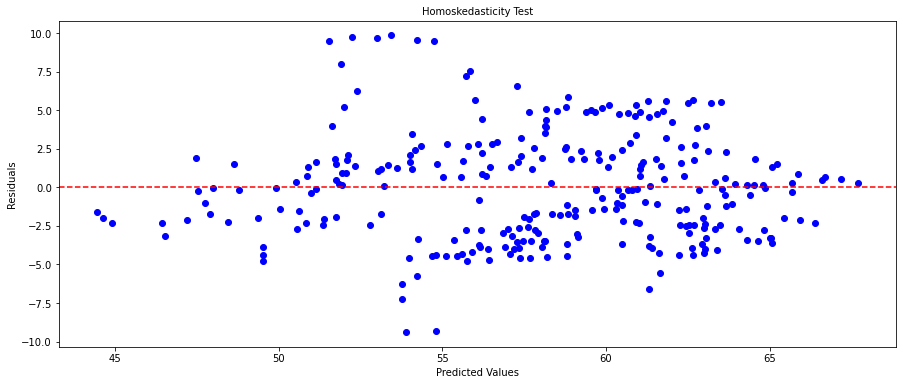

In [27]:
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'b')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 10)
ax.set_ylabel('Residuals', fontsize = 10)
ax.set_title('Homoskedasticity Test', fontsize = 10)
plt.show()

In [28]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                      Y   R-squared:                        0.6638
Estimator:                  PooledOLS   R-squared (Between):              0.6684
No. Observations:                 285   R-squared (Within):               0.6500
Date:                Fri, Apr 21 2023   R-squared (Overall):              0.6638
Time:                        02:40:33   Log-likelihood                   -759.38
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      78.140
Entities:                          19   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                   F(7,277)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             34.400
                            

In [29]:
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([pdf, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis = 1).fillna(0)
#exog = sm.tools.tools.add_constant(dataset['income']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], X)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

{'LM-Stat': 180.8199786214924, 'LM p-val': 1.4675901304390314e-21, 'F-Stat': 12.34790484531152, 'F p-val': 3.0158471653341463e-37}


In [30]:
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], X)

print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 54.816254116626475, 'LM p-val': 1.6212552500564528e-09, 'F-Stat': 9.42359103595613, 'F p-val': 1.7379931209131092e-10}


In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

In [ ]:
sm.stats.acorr_ljungbox(pooled_OLS_dataset['residual'], return_df=True)

In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
# random effects model
model_re = RandomEffects(Y, X) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(Y, X, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)


In [ ]:
print(fe_res)

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [ ]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

In [ ]:
fe_res.params

In [ ]:
print(type(fe_res.params))

In [ ]:
corr_matrix = pdf[['Undernourishment','log_CO2','Health','Educ','Unemployment','Corruption','log_Communicable']].corr()
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix of Independent Variables", size = 15)
plt.show()

In [ ]:
ax = sn.heatmap(corr_matrix, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [ ]:
!jt -t grade3 -dfs 13 -ofs 13 -tfs 17 -cellw 100%